**Importing Libraries**

In [165]:
import pandas as pd
from pandas.plotting import parallel_coordinates
import numpy as np
import scipy

import calendar
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Importing the dataset**

In [166]:
data = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [167]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [168]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [169]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


(267, 9)

In [170]:
# Data Description :
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Longitude,Latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


**Dropping unneccsary feature**

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


**Removing missing values and data duplication**

In [172]:
data.nunique()

,0
Region,27
Date,10
Frequency,1
Estimated Unemployment Rate (%),252
Estimated Employed,267
Estimated Labour Participation Rate (%),248
Region.1,5
Longitude,27
Latitude,24


In [173]:
# Checking for missing values :
data.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
Longitude,0
Latitude,0


In [174]:
data=data.fillna(method='bfill')
data.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
Longitude,0
Latitude,0


In [175]:
# Checking for duplicate values :
data.duplicated().sum()

0

In [176]:
# Datatypes :
data.dtypes

,0
Region,object
Date,object
Frequency,object
Estimated Unemployment Rate (%),float64
Estimated Employed,int64
Estimated Labour Participation Rate (%),float64
Region.1,object
Longitude,float64
Latitude,float64


In [177]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


**Label Encoding**

In [178]:
data.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

# Converting 'Frequency' and 'Region' columns to categorical data type
data['Frequency'] = data['Frequency'].astype('category')

data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Extracting month from 'Date' and creating a 'Month' column
data['Month'] = data['Date'].dt.month

# Converting 'Month' to integer format
data['Month_int'] = data['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
data['Month_name'] = data['Month_int'].apply(lambda x: calendar.month_abbr[x])

# Mapping integer month values to abbreviated month names
data['Month_name'] = data['Month_int'].apply(lambda x: calendar.month_abbr[x])

# Dropping the original 'Month' column
data.drop(columns='Month', inplace=True)

# Convert the 'Region' column to a categorical data type
data['Region'] = data['Region'].astype('category')

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   States                               267 non-null    object        
 1   Date                                 267 non-null    datetime64[ns]
 2   Frequency                            267 non-null    category      
 3   Estimated Unemployment Rate          267 non-null    float64       
 4   Estimated Employed                   267 non-null    int64         
 5   Estimated Labour Participation Rate  267 non-null    float64       
 6   Region                               267 non-null    category      
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
 9   Month_int                            267 non-null    int64         
 10  Month_name    

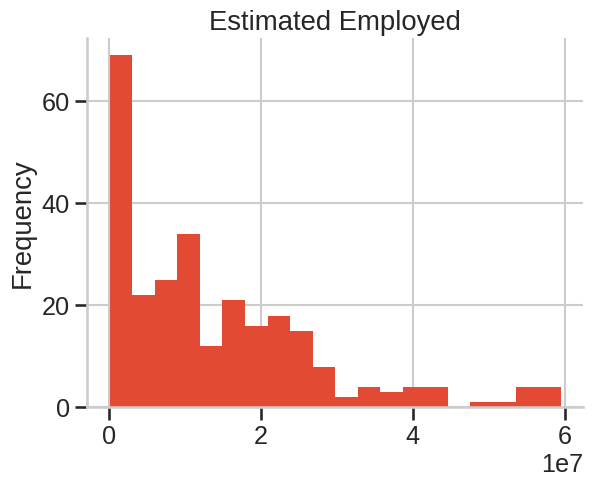

In [180]:
# @title Estimated Employed

from matplotlib import pyplot as plt
data['Estimated Employed'].plot(kind='hist', bins=20, title='Estimated Employed')
plt.gca().spines[['top', 'right',]].set_visible(False)

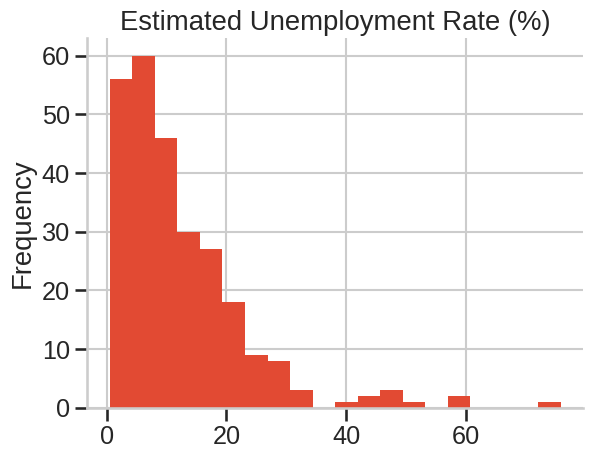

In [181]:
# @title Estimated Unemployment Rate (%)

from matplotlib import pyplot as plt
data['Estimated Unemployment Rate'].plot(kind='hist', bins=20, title='Estimated Unemployment Rate (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

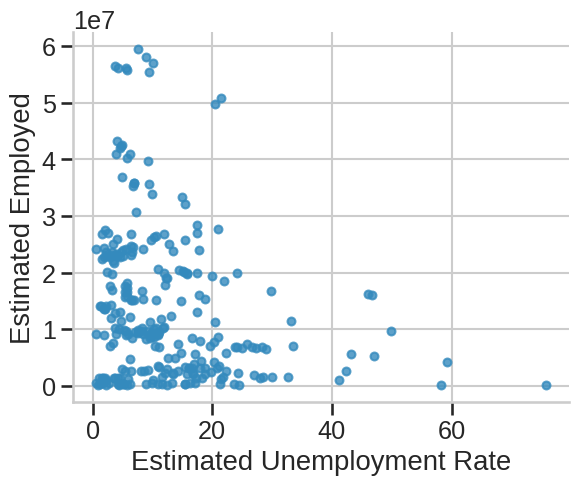

In [182]:
# @title Estimated Unemployment Rate (%) vs Estimated Employed

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Estimated Unemployment Rate', y='Estimated Employed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

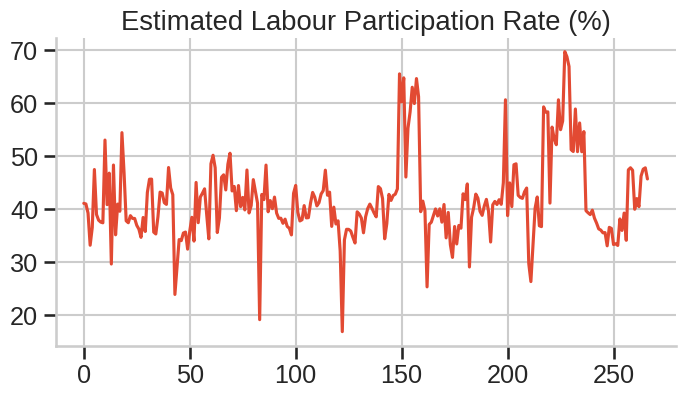

In [183]:
# @title Estimated Labour Participation Rate (%)

from matplotlib import pyplot as plt
data['Estimated Labour Participation Rate'].plot(kind='line', figsize=(8, 4), title='Estimated Labour Participation Rate (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   States                               267 non-null    object        
 1   Date                                 267 non-null    datetime64[ns]
 2   Frequency                            267 non-null    category      
 3   Estimated Unemployment Rate          267 non-null    float64       
 4   Estimated Employed                   267 non-null    int64         
 5   Estimated Labour Participation Rate  267 non-null    float64       
 6   Region                               267 non-null    category      
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
 9   Month_int                            267 non-null    int64         
 10  Month_name    

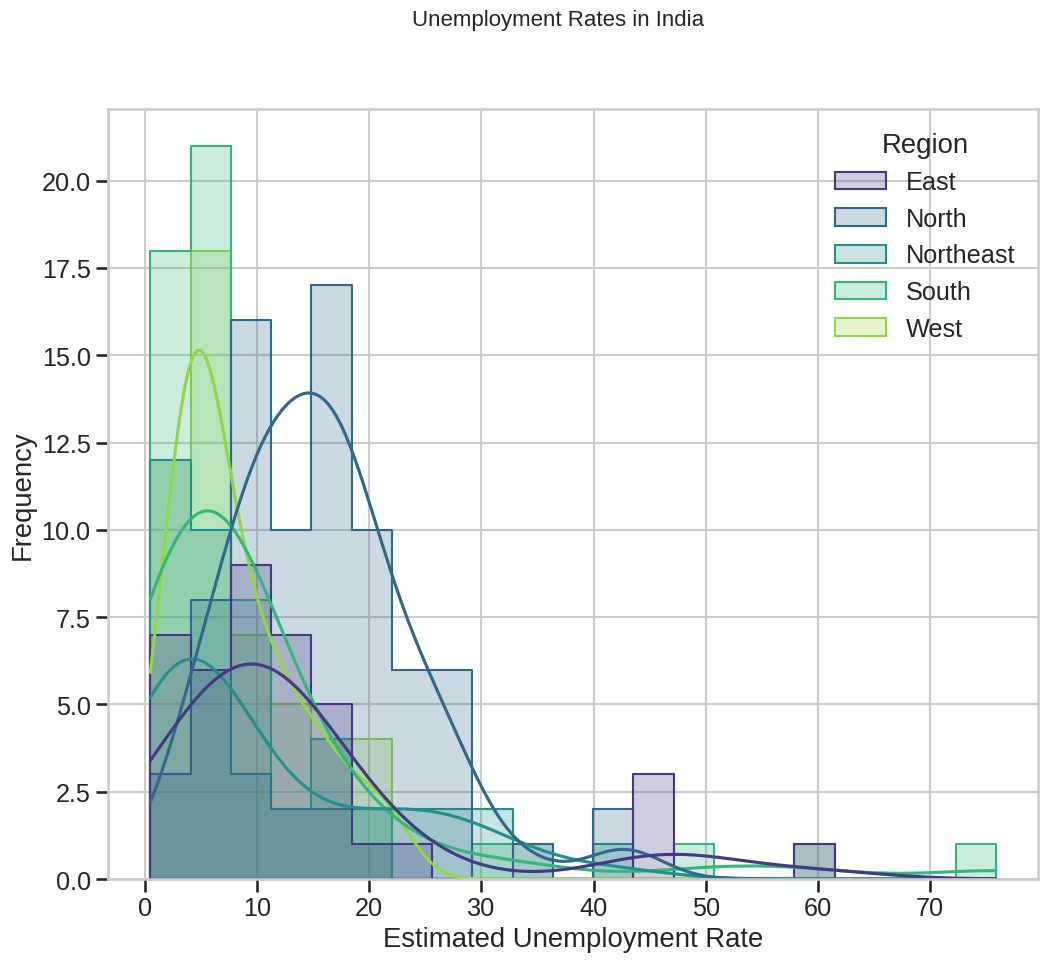

In [185]:
plt.figure(figsize=(12, 10))
plt.suptitle("Unemployment Rates in India", fontsize=16)
sns.histplot(data=data, x="Estimated Unemployment Rate", hue="Region", kde=True, element="step", palette="viridis")
plt.xlabel("Estimated Unemployment Rate")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


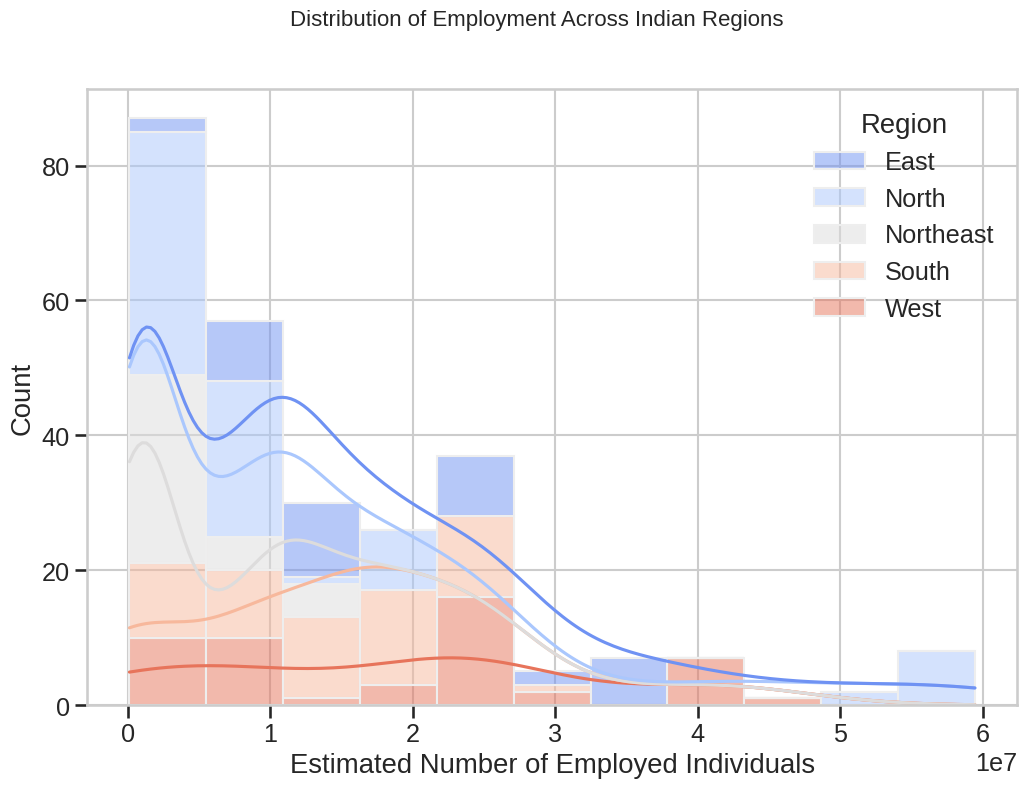

In [186]:
# Plotting the distribution of employed population by region
plt.figure(figsize=(12, 8))
plt.suptitle("Distribution of Employment Across Indian Regions", fontsize=16)
sns.histplot(data=data, x="Estimated Employed", hue="Region", kde=True, multiple="stack", palette="coolwarm")
plt.xlabel("Estimated Number of Employed Individuals")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [187]:
# Calculating the 5-number summary for selected numerical columns
summary_stats = data[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].describe().T

# Rounding to 2 decimal places and adding custom formatting
summary_stats_rounded = summary_stats.round(2)

# Renaming the index for clarity and adding an additional column for the IQR
summary_stats_rounded.index = ['Unemployment Rate (%)', 'Employed Population', 'Labour Participation Rate (%)']
summary_stats_rounded['IQR'] = summary_stats_rounded['75%'] - summary_stats_rounded['25%']

# Displaying the transposed summary statistics
summary_stats_rounded


,count,mean,std,min,25%,50%,75%,max,IQR
Unemployment Rate (%),267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85,11.92
Employed Population,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00,19039755.50
Labour Participation Rate (%),267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69,6.80


In [188]:
# Grouping by 'Region' and calculating the mean for numerical columns
regional_statistics = data.groupby('Region')[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].mean().reset_index()

# Rounding the mean values to 2 decimal places for better readability
regional_statistics_rounded = regional_statistics.round(2)

# Displaying the rounded statistics
regional_statistics_rounded


,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


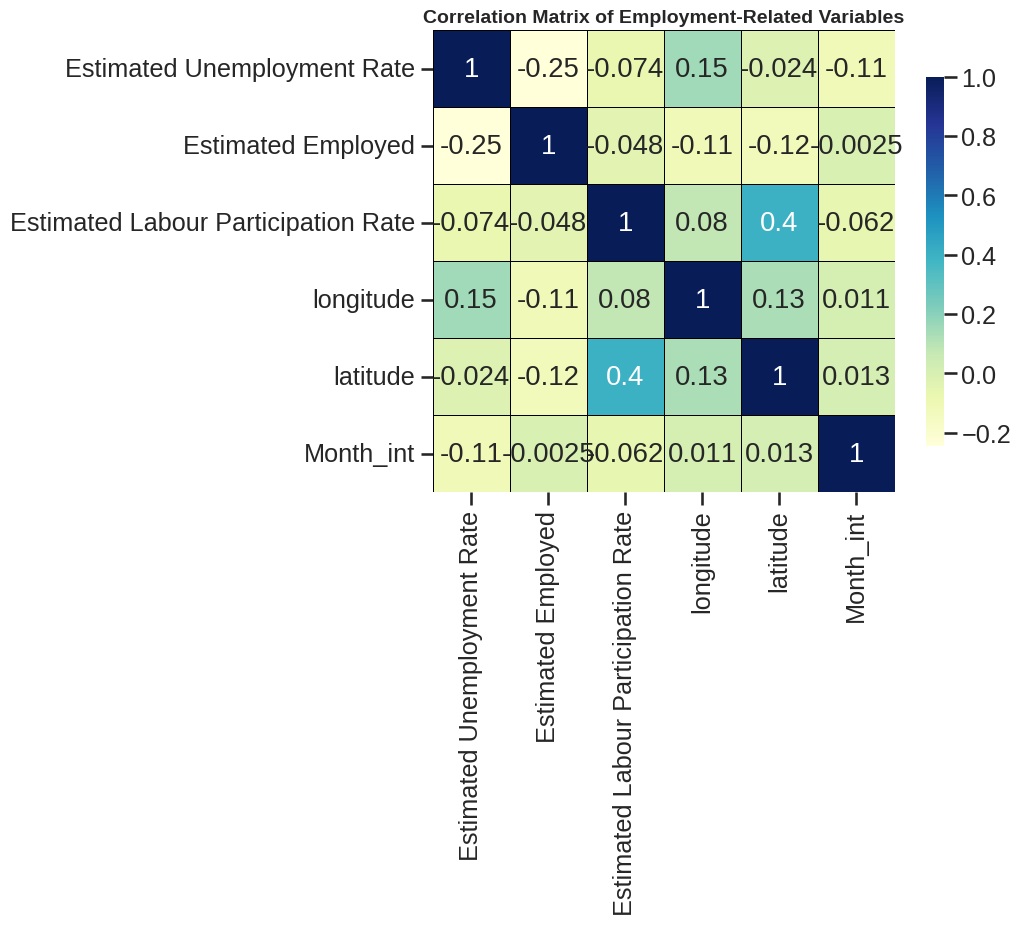

In [189]:
# Selecting relevant columns for correlation analysis
corr_matrix = data[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'longitude', 'latitude', 'Month_int']].corr()

# Setting up the figure and context
plt.figure(figsize=(8, 6))
sns.set_context('talk', font_scale=1.1)

# Creating the heatmap with a different color palette and enhanced readability
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", linewidths=0.5, linecolor='black', square=True, cbar_kws={"shrink": .8})

# Adding a title to the heatmap
plt.title("Correlation Matrix of Employment-Related Variables", fontsize=14, fontweight='bold')
plt.show()


In [190]:
# Creating the box plot with a different color scheme and title
fig = px.box(
    data_frame=data,
    x='States',
    y='Estimated Unemployment Rate',
    color='States',
    title='State-wise Distribution of Unemployment Rate in India',
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Customizing the layout with a descending order and adjusted title position
fig.update_layout(
    xaxis={'categoryorder': 'total descending'},
    title={'x': 0.5},  # Center the title
    xaxis_title="States",
    yaxis_title="Estimated Unemployment Rate",
    template="plotly_white"
)

# Display the plot
fig.show()


In [191]:
# Create the bar chart
fig = px.bar( data_frame=data, x='States', y='Estimated Unemployment Rate', color='States',
             title='Average Unemployment Rate by State',
             color_discrete_sequence=px.colors.qualitative.Plotly)

# Update layout for better aesthetics
fig.update_layout(
    xaxis={'categoryorder': 'total descending'},
    yaxis_title='Estimated Unemployment Rate (%)',
    xaxis_title='State',
    title_font=dict(size=20, family='Arial, sans-serif', color='darkblue'),
    legend_title='States',
    template='plotly_white'
)

# Show the figure
fig.show()


**During Lockdown**

In [192]:
#creating a scatter geospatial plot
fig = px.scatter_geo(data,'longitude', 'latitude',
                     color="Region",
                     hover_name="States",
                     size="Estimated Unemployment Rate",
                     animation_frame="Month_name",
                     scope='asia',
                     title='Lockdown Impact throughout India')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200

#updating the geospatial axes ranges and ocean color
fig.update_geos(lataxis_range=[5,35],
                lonaxis_range=[65, 100],
                oceancolor="#6dd5ed",
                showocean=True)

fig.show()

In [193]:
# Bar plot for Unemployment Rate by State (Monthly)

# Creating an animated bar plot with a different color scheme and more descriptive labels
fig = px.bar(
    data,
    x='States',
    y='Estimated Unemployment Rate',
    animation_frame='Month_name',
    color='Region',
    title='Monthly Unemployment Rate by State (Jan 2020 - Oct 2020)',
    color_discrete_sequence=px.colors.qualitative.Pastel1
)

# Customizing the layout with descending order, axis titles, and template
fig.update_layout(
    xaxis={'categoryorder': 'total descending'},
    xaxis_title="States",
    yaxis_title="Estimated Unemployment Rate",
    template="plotly_dark",
    title={'x': 0.5},  # Center the title
)

# Display the plot
fig.show()


**After Lockdown**

In [194]:
# Filtering the dataset for the period after lockdown (months 4 to 7 inclusive)
data_after_lockdown = data[(data['Month_int'] >= 4) & (data['Month_int'] <= 7)]

# Filtering the dataset for the period before lockdown (months 1 to 4 inclusive)
data_before_lockdown = data[(data['Month_int'] >= 1) & (data['Month_int'] <= 4)]

# Grouping the data by "States" and calculating the mean unemployment rate after lockdown
mean_unemployment_after = data_after_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

# Grouping the data by "States" and calculating the mean unemployment rate before lockdown
mean_unemployment_before = data_before_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

# Merging the two dataframes to compare unemployment rates
mean_unemployment_after['Unemployment Rate Before Lockdown'] = mean_unemployment_before['Estimated Unemployment Rate']

# Renaming columns for clarity
mean_unemployment_after.columns = ['States', 'Unemployment Rate After Lockdown', 'Unemployment Rate Before Lockdown']

# Displaying the top results
mean_unemployment_after.head()


,States,Unemployment Rate After Lockdown,Unemployment Rate Before Lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250
2,Bihar,30.8025,20.7425
3,Chhattisgarh,9.6025,7.2450
4,Delhi,24.3600,17.6975


In [195]:
# Computing the % change in unemployment rate
mean_unemployment_after['% Change in Unemployment'] = round(
    (mean_unemployment_after['Unemployment Rate After Lockdown'] - mean_unemployment_after['Unemployment Rate Before Lockdown']) /
    mean_unemployment_after['Unemployment Rate Before Lockdown'] * 100, 2
)

# Sorting the dataframe based on "% Change in Unemployment"
mean_unemployment_after = mean_unemployment_after.sort_values('% Change in Unemployment')


In [196]:
# Plotting a bar chart for the "% Change in Unemployment After Lockdown"
fig = px.bar(
    mean_unemployment_after,
    x='States',
    y='% Change in Unemployment',
    color='% Change in Unemployment',
    title='% Change in Unemployment After Lockdown',
    color_continuous_scale=px.colors.sequential.Viridis
)

# Display the plot
fig.show()